<a href="https://colab.research.google.com/github/faizanindyo/FaizAnd/blob/main/Tugas%202/Polynomial%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
Mean Squared Error: 52527916.36877499
R-squared: 0.897164578089087


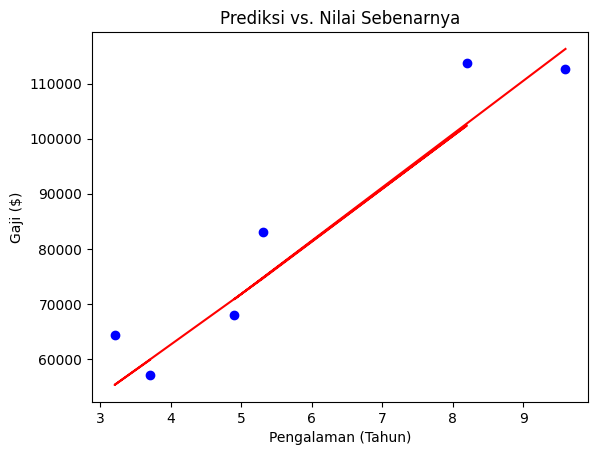

In [1]:
# Nama: Muhammad Faiz Anindyo Widodo
# NIM: 1103213011
# Judul Tugas: Machine Learning dengan Polynomial Regression
# Lecture: 2
# Model: Polynomial Regression
# Dataset: Salary_Data_Simple_SVR.csv

# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Tugas 2 Machine Learning/Salary_Data_Simple_SVR.csv')

# Menampilkan lima baris pertama dari dataset untuk memahami struktur data
print(data.head())

# Memilih fitur (pengalaman) dan target (gaji)
X = data.iloc[:, :-1].values  # Fitur (pengalaman)
y = data.iloc[:, 1].values  # Target (gaji)

# Membagi dataset menjadi data latih dan data uji dengan perbandingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat objek PolynomialFeatures untuk mentransformasi fitur menjadi polinomial hingga derajat kedua
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Membuat objek model regresi linear
model = LinearRegression()

# Melatih model menggunakan data latih yang telah ditransformasi
model.fit(X_train_poly, y_train)

# Memprediksi gaji menggunakan data uji yang telah ditransformasi
y_pred = model.predict(X_test_poly)

# Menghitung nilai MSE dan koefisien determinasi (R-squared) untuk evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualisasi prediksi vs. nilai sebenarnya
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel("Pengalaman (Tahun)")
plt.ylabel("Gaji ($)")
plt.title("Prediksi vs. Nilai Sebenarnya")
plt.show()